In [16]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def apply_zoom(image_path, zoom_box, inset_position=(0.1, 0.1, 0.3, 0.3)):
    """
    Aplica um zoom em uma região da imagem e exibe com uma área destacada.
    
    :param image_path: Caminho da imagem original.
    :param zoom_box: Tupla (x1, y1, x2, y2) definindo a área de zoom.
    :param inset_position: Posição do zoom na imagem principal (x, y, largura, altura).
    """
    # Carregar a imagem
    image = Image.open(image_path)
    
    # Recortar a região de zoom
    zoomed_image = image.crop(zoom_box)
    
    # Criar a figura
    fig, ax = plt.subplots(figsize=(5, 4))
    ax.imshow(image)
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Adicionar a área do zoom com um retângulo pontilhado
    rect = patches.Rectangle((zoom_box[0], zoom_box[1]),
                             zoom_box[2] - zoom_box[0], zoom_box[3] - zoom_box[1],
                             linewidth=2, edgecolor='black', linestyle='-', facecolor='none')
    ax.add_patch(rect)
    
    # Criar um inset para mostrar a área ampliada
    zoom_ax = fig.add_axes(inset_position)
    zoom_ax.imshow(zoomed_image)
    zoom_ax.set_xticks([])
    zoom_ax.set_yticks([])
    zoom_ax.set_frame_on(True)
    
    # Obter coordenadas do inset
    inset_x, inset_y, inset_w, inset_h = inset_position
    
    # Adicionar linhas conectando os cantos correspondentes da área original ao zoom
    con1 = patches.ConnectionPatch(
        xyA=(zoom_box[0], zoom_box[3]), xyB=(0, 0),
        coordsA='data', coordsB='axes fraction', axesA=ax, axesB=zoom_ax,
        color='black', linestyle='dotted'
    )
    ax.add_patch(con1)
    
    con2 = patches.ConnectionPatch(
        xyA=(zoom_box[2], zoom_box[1]), xyB=(1, 1),
        coordsA='data', coordsB='axes fraction', axesA=ax, axesB=zoom_ax,
        color='black', linestyle='dotted'
    )
    ax.add_patch(con2)
    
    plt.savefig(f"../imagens/normalizacoes/zoom/{image_path.split('/')[-1]}", bbox_inches='tight', pad_inches=0, dpi=300)
    plt.savefig(f"../imagens/normalizacoes/zoom/{image_path.split('/')[-1].replace('.jpg', '.svg').replace('.png', '.svg')}", bbox_inches='tight', pad_inches=0, dpi=300)
    
    plt.show()

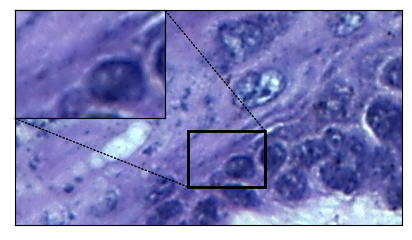

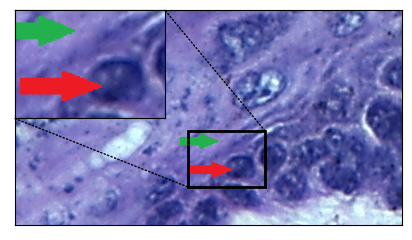

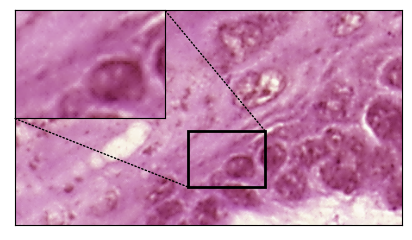

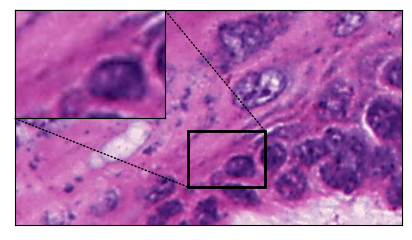

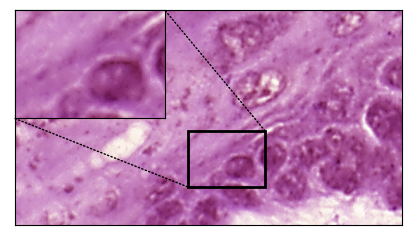

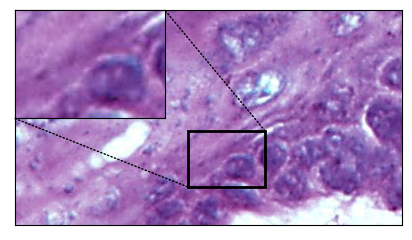

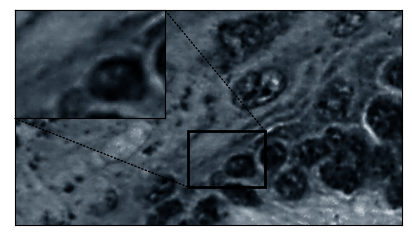

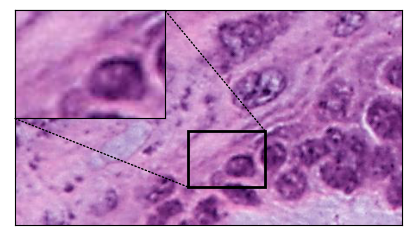

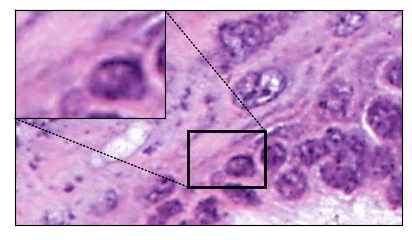

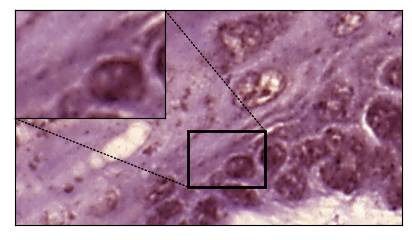

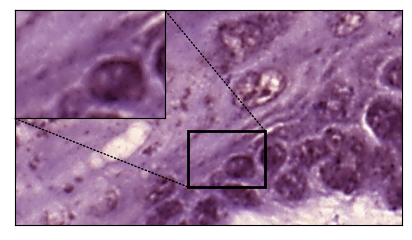

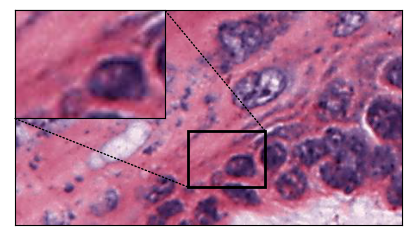

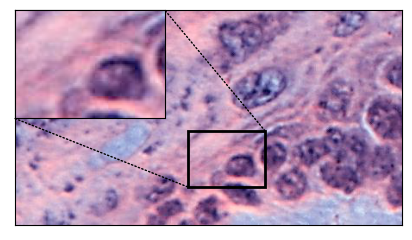

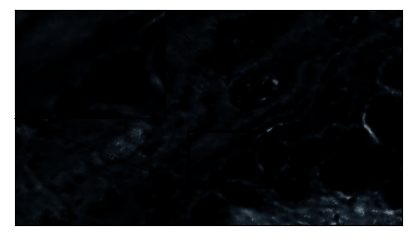

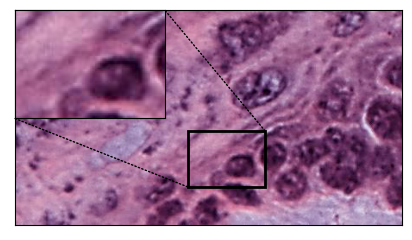

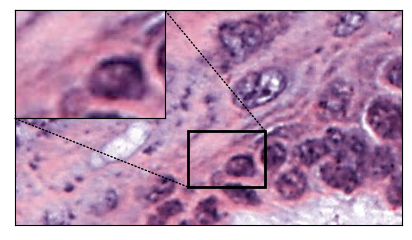

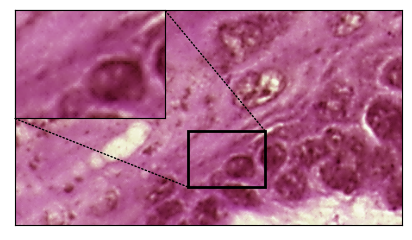

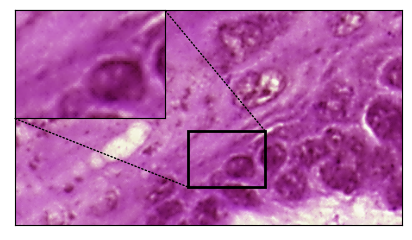

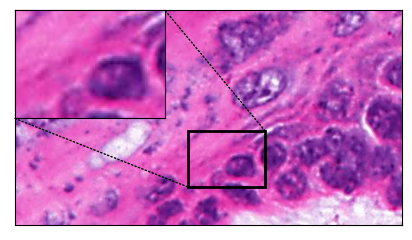

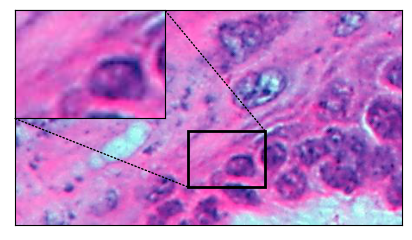

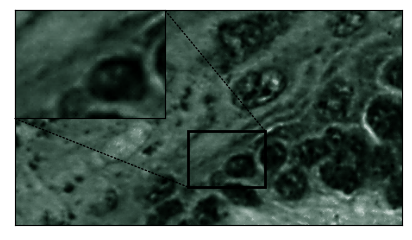

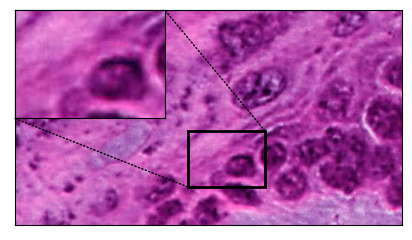

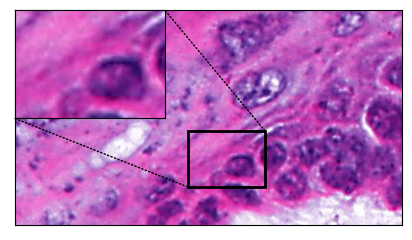

In [17]:
import os

path = "../imagens/normalizacoes/"
zoom_box = (200, 140, 290, 205)  # (x1, y1, x2, y2)
inset_position = (0.125, 0.478, 0.3, 0.3) # (x, y, largura, altura)
for img in os.listdir(path):
    if os.path.isfile(path + img):
        apply_zoom(path + img, zoom_box, inset_position)

In [ ]:
# Exemplo de uso
image_path = "../imagens/normalizacoes/original.png"  # Altere para o caminho correto
zoom_box = (200, 140, 290, 205)  # (x1, y1, x2, y2)
inset_position = (0.125, 0.478, 0.3, 0.3) # (x, y, largura, altura)

apply_zoom(image_path, zoom_box, inset_position)